## Predicting Property Value

By: Rajesh Lamichhane, 12 September 2022

<hr style="border-top: 10px groove brown; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Goals:

The goals of this project are to find key drivers of the property value for the Single Family Residential Properties, to construct a Machine Learning Regression Model that can predict the tax values of such properties and offer recommendations on how to improve future predictions.

### Project Description

In the post pandemic era, property values have constanstly risen up and predicting those values have been equally challenging. Zillow, a leading real estate and rental marketplace, relies on the ML models that predicts these property values. Any improvement upon the model can be quite benificial. This project will analyze property attributes in relation to their 2017 assessed tax value, develop a model for predicting that value based on those attributes, and leave with recommendations for how to improve future predictions

### Initial Questions

1. What sort of relationship is there between number of bedroom and the tax value?
2. What sort of relationship is there between number of bathroom and the tax value?
3. Is there significant correlation between area of property and its value?
4. How does tax value compare by counties throughtout the years?

### Imports

In [1]:
# tabular data manipulation:
import pandas as pd
import numpy as np

# modular scripts for data wrangling
import acquire
import prepare

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import viz

#for hypothesis tests
import scipy.stats as stats

#sklearn metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,LassoLars,TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,explained_variance_score

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

### Acquire Data

I acquired the zillow data from Zillow database from MySQL hosted at data.codeup.com. The code needed to acquire the data from the CodeUp database can be found in the acquire.py file. Access credentials are required to access the CodeUp database. The acquire file also creates a local copy of the dataframe as zillow.csv.

In [2]:
#acquire zillow data
zillow = acquire.get_zillow_data()

### Prepare Data

The code for this stage can be found in the prepare.py file

In [3]:
#take a peak at the data
zillow.head(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,2.0,1.0,1174.0,155395.0,1937.0,6037.0
1,5.0,3.0,2299.0,283765.0,1977.0,6037.0
2,2.0,1.5,1008.0,332406.0,1964.0,6059.0
3,6.0,5.5,4041.0,1587088.0,2005.0,6059.0
4,2.0,2.0,1064.0,231539.0,1964.0,6059.0


In [4]:
#shape of our data
zillow.shape

(52441, 6)

In [5]:
#what do we have in our columns
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   yearbuilt                     52325 non-null  float64
 5   fips                          52441 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


    it seems we have some nulls here in our data

Steps taken to clean our data :
1. Outliers: Tukey method (14% observation removed)
2. Renamed column names
3. Assigned fips with actual county names
4. Nulls : Removing outliers removed our all nulls as well
5. Casted bedroom to integer values

In [6]:
#clean up data, prepping to split
zillow = prepare.prep_zillow_data(zillow)

In [7]:
#get info about cleaned data
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45241 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedroom     45241 non-null  int64  
 1   bathroom    45241 non-null  float64
 2   area        45241 non-null  float64
 3   tax_value   45241 non-null  float64
 4   year_built  45241 non-null  float64
 5   county      45241 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.4+ MB


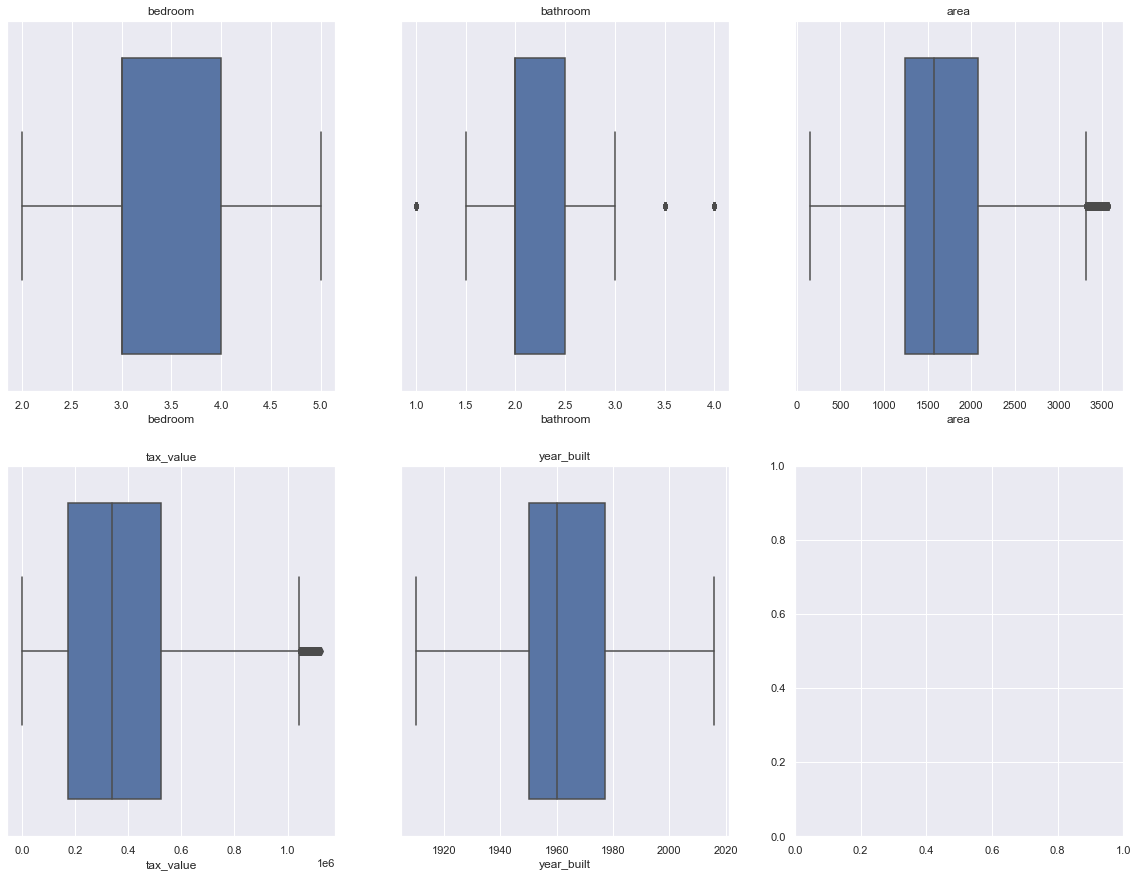

In [8]:
#visualise data spread from data clean up
viz.show_outliers(zillow)

    we still retained a number of outliers in area and tax values

In [9]:
#split data into train(56%), validate(24%) and test(20%)
train,validate,test = prepare.split_zillow_data(zillow)

In [10]:
#check the split
train.shape,validate.shape,test.shape

((25334, 6), (10858, 6), (9049, 6))

### Explore

    we will explore only on our train data

1. How are bedroom arelated with tax value?
2. What about bathroom? Do bedroom and bathroom have same relationship with tax value?

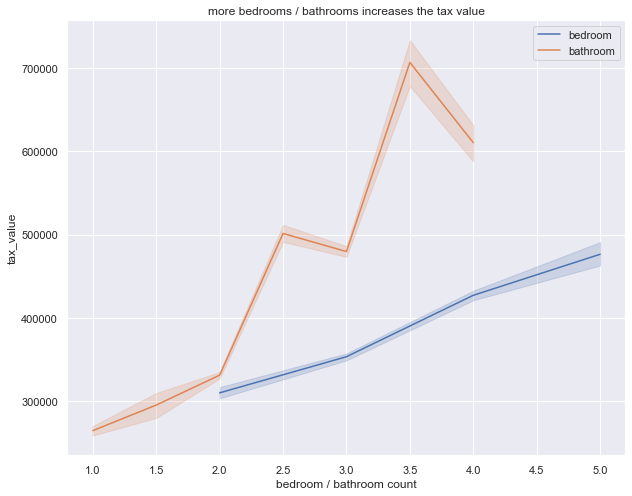

In [11]:
#call in show_lineplot function
viz.show_lineplot(train)

    greater increase in tax value with more bathroom than bedroom

Lets run t test to confirm their relation with tax value

In [12]:
#call in 2 sample 1 tailed t test function
viz.t_test_bedroom(train)

null hypothesis: tax value of 5 bedroom property <= tax value of 2 bedroom property
alternate hypothesis: tax value of 5 bedroom property > tax value of 2 bedroom property

alpha:  0.05 , p/2:  6.027831022147674e-110
reject null hypothesis
we conclude that the tax value of 5 bedroom property > tax value of 2 bedroom property


Lets run t test to see their relation with tax value

In [13]:
#call in 2 sample 1 tailed t test fucntion
viz.t_test_bathroom(train)

null hypothesis: tax value of 4 bathroom property <= tax value of 1 bathroom property
alternate hypothesis: tax value of 4 bathroom property > tax value of 1 bathroom property

alpha:  0.05 , p/2:  5.001022171798062e-296
reject null hypothesis
we conclude  tax value of 4 bathroom property > tax value of 1 bathroom property


3. Is there significant correlation between area of property and its value?

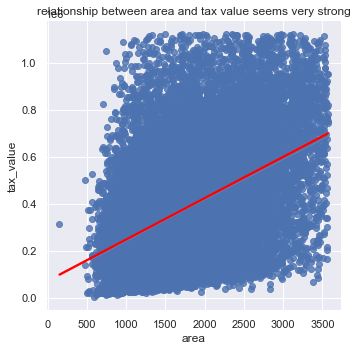

In [14]:
#call in show_lmplot function
viz.show_lmplot(train)

    the inclination of regression line indicates a good positive correlation between the area of property with its tax value
    we will back it up by using pearson's correlation test

In [15]:
#run function that perform pearson's correlation test
viz.find_correlation(train)

null hypothesis: there is no linear correlation between area of property and its tax value
alternate hypothesis: there is a linear correlation between area of property and its tax value

alpha:  0.05 , p:  0.0 , r :  0.4451299354405005
reject null hypothesis
we conclude that the there is a linear correlation between area of property and its tax value


    here, P is zero, and r value is fairly good. This test confirms the linear correalation.
    r value most likely would have been  better if we did not have largely spread out values

4. How does tax value compare by counties throughtout the years?

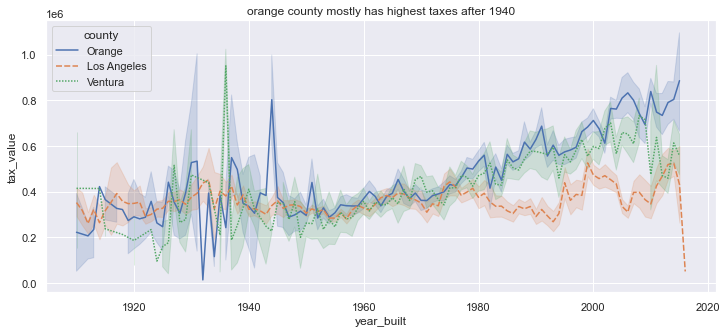

In [16]:
#call in function to draw lineplot
viz.tax_by_county(train)

    Orange county generally has the highest tax value in newer houses
    Tax value of newer houses in Los Angelese county didnot trend same way as the other two

we will use correlation chart on heatmap to visualize the correlation of tax value with other independent features

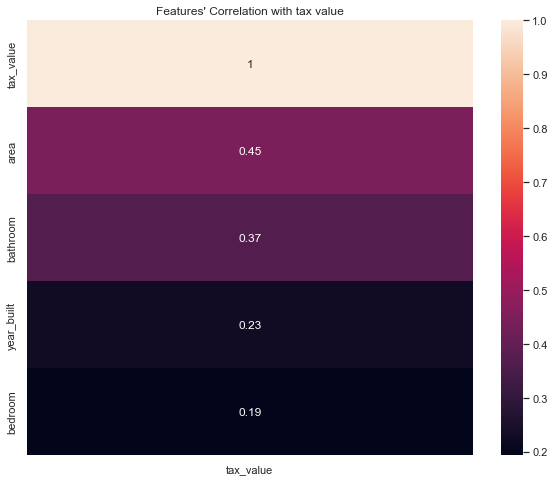

In [17]:
#call in heatmap function
viz.heatmap(train)

We have found good correlation between our target, tax value and area of property, number of bathrooms and year built. We will use only these features for our modeling process.

### Modeling

#### Scaling our data:

Since all our features are numeric and have different scales, we will scale them using a linear scaler called  MinMaxScaler. The values in each of our features with then range in between 0 and 1.

Only train data was used to fit to the scaler.

In [18]:
#features used for modeling
features = ["area", "bathroom", "year_built"]

In [19]:
#call in function from viz.py that will use MaxMinScaler to scale our features
#fit only train data
train,validate,test = viz.scale_data(train,validate,test,features)

Set up target(y) vs features(X):

    Target is tax value

In [20]:
#create subsets using scaled features
#X: independent features
#y: target
X_train = train[["area_scaled","bathroom_scaled","year_built_scaled"]]
y_train = train[["tax_value"]]
X_validate = validate[["area_scaled","bathroom_scaled","year_built_scaled"]]
y_validate = validate[["tax_value"]]
X_test = test[["area_scaled","bathroom_scaled","year_built_scaled"]]
y_test = test[["tax_value"]]

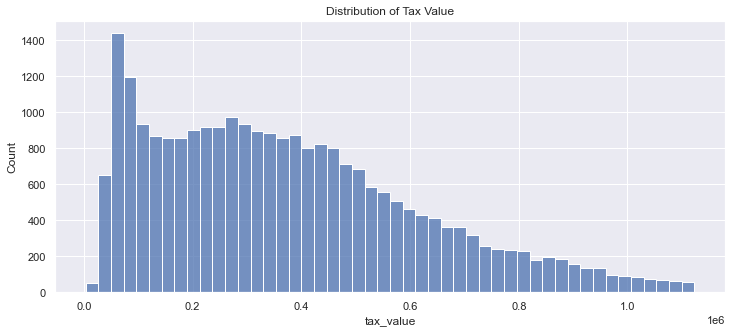

In [21]:
# peek at the distribution of my target variable
viz.visualise_target(y_train)

    By applying Central Limit therom, we can assume that our target follows a normal distribution
    We will use this information during modeling

#### Baseline:
    
Baseline represents the prediction of the tax value with out using features. We will use mean and median of our target from train data and calculate lower baseline RMSE. Our models will then aim to beat this baseline RMSE.

#### RMSE Baseline calculation:

In [22]:
#apply baseline value to train and validate
y_train["baseline_mean"] = y_train.tax_value.mean()
y_train["baseline_median"] =y_train.tax_value.median()
y_validate["baseline_mean"] = y_validate.tax_value.mean()
y_validate["baseline_median"] =y_validate.tax_value.median()

#calculate rmse using actual and baseline mean
rmse_train_mean=mean_squared_error(y_train.tax_value,y_train.baseline_mean, squared = False)
rmse_validate_mean=mean_squared_error(y_validate.tax_value,y_validate.baseline_mean, squared = False)

print("rmse using Mean on \nTrain: ", round(rmse_train_mean,2), "\nValidate: ", round(rmse_validate_mean,2))
print()

#calculate rmse using actual and baseline mean
rmse_train_median= round(mean_squared_error(y_train.tax_value,y_train.baseline_median, squared = False),2)
rmse_validate_median= round(mean_squared_error(y_validate.tax_value,y_validate.baseline_median, squared = False),2)

print("RMSE using Median on \nTrain: ", rmse_train_median, "\nValidate: ", rmse_validate_median)

rmse using Mean on 
Train:  243654.05 
Validate:  244802.95

RMSE using Median on 
Train:  246425.01 
Validate:  247569.73


    Since RMSE on train/validate using mean is smaller than that of using median, we will use mean.

In [23]:
#make a dataframe to capture model and RMSE 
metric_df = pd.DataFrame(data=[
            {
                'model': 'Baseline', 
                'RMSE_train': rmse_train_mean,
                'RMSE_validate': rmse_validate_mean
                }
            ])

#### Model 1: OLS (LinearRegression)

In [24]:
# create the model object
lm = LinearRegression(normalize = True)
# Fit the model
lm.fit(X_train, y_train.tax_value)
# Predict y on train
y_train['tax_value_pred_lm'] = lm.predict(X_train)
# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate)
    
# evaluate: train rmse
rmse_train = round(mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm,squared = False), 2)
# evaluate: validate rmse
rmse_validate = round(mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm,squared = False),2)

#append model and RMSE from OLS model to metric dataframe
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

#### Model 2: LASSOLARS

In [25]:
# create the model object
lars = LassoLars(alpha=1)
# fit the model.
lars.fit(X_train, y_train.tax_value)
# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)
# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)
# evaluate: train rmse
rmse_train = round(mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars, squared = False),2)
# evaluate: validate rmse
rmse_validate = round(mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars,squared = False),2)

#append model and RMSE from LASSOLARS model to metric dataframe
metric_df = metric_df.append({
    'model': 'LASSOLARS(alpha = 1)', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

#### Model 3: GLM (TweedierRegressor)

In [26]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)
# fit the model to our training data.
glm.fit(X_train, y_train.tax_value)
# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train)
# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)
# evaluate: train rmse
rmse_train = round(mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm,squared = False),2)
# evaluate: validate rmse
rmse_validate = round(mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm, squared = False),2)

#append model and RMSE from GLM model to metric dataframe
metric_df = metric_df.append({
    'model': 'Tweedie Regressor(power=1, alpha=0)', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

#### Model 4: Polynomial Regression

In [27]:
#create model object
pf= PolynomialFeatures(degree= 5)
# fit and transform X_train_scaled
X_train_degree5 = pf.fit_transform(X_train)
# transform X_validate_scaled 
X_validate_degree5 = pf.transform(X_validate)

# create the model object
lm5 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train,  
lm5.fit(X_train_degree5, y_train.tax_value)
# predict train
y_train['tax_value_pred_lm5'] = lm5.predict(X_train_degree5)
# predict validate
y_validate['tax_value_pred_lm5'] = lm5.predict(X_validate_degree5)

# evaluate: train rmse
rmse_train = round(mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm5, squared = False),2)
# evaluate: validate rmse
rmse_validate = round(mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm5, squared = False) , 2)

#append model and RMSE from Polynomial Regression model to metric dataframe
metric_df = metric_df.append({
    'model': 'Polynomial Regression(degree = 5)', 
    'RMSE_train': rmse_train,
    'RMSE_validate': rmse_validate,
    }, ignore_index=True)

In [28]:
metric_df

,model,RMSE_train,RMSE_validate
0,Baseline,243654.046302,244802.954349
1,OLS Regressor,218017.630000,219036.820000
2,LASSOLARS(alpha = 1),218017.710000,219036.790000
3,"Tweedie Regressor(power=1, alpha=0)",218057.880000,218671.960000
4,Polynomial Regression(degree = 5),215107.310000,215571.900000


    Top Performing Model (smallest RMSE): Polynomial regression(degree = 5)

    It beats baseline by 11%
    
    We shall use this model to predict on our unseen data


##### Making Prediction using Top Performing Model

In [29]:
#call in prepared fucntion to make prediction
viz.test_prediction(X_train,y_train,X_test,y_test,degree = 5)

RMSE for Polynomial Model, degrees= 5 
test:  218218.39357439074 
r^2:  0.22335653866238325


    Applying our top perfomrming model, we were able to predict the tax value.
    
    RMSE on test was 2181218, better than baseline
    
    Cofficient of determination for unseen data (r^2) was 0.22
    

In [30]:
#peek at prediction from the top performing model
y_test.rename(columns = {"tax_value_pred_lm5":"predicted tax value"})[["predicted tax value"]].head()

,predicted tax value
0,343916.463884
1,238668.818242
2,457686.265809
3,299781.517463
4,216133.598906


<Figure size 864x864 with 0 Axes>

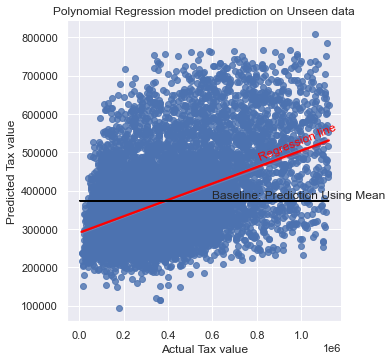

In [31]:
#visualize relationship of actual vs predicted target
viz.visualize_test_prediction(y_train,y_test)

### Conclusion: 
    
We were able to build a model that was 11% better than the baseline

However, the error (RMSE) was high and r^2 was not too great

This may be because of our highly spread out data

### Recommendation:

Explore on more features like pool and garage

Collect other stats such crime rate, happiness index, household income, school zone

### Next Step:
    
Focus more on exploration

Investigate recent dips in tax values at Los Angeles county
